In [3]:
!unzip zomato.csv.zip

Archive:  zomato.csv.zip
  inflating: zomato.csv              


In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("zomato.csv")

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.shape

(51717, 17)

In [7]:
data["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [8]:
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
17023,https://www.zomato.com/bangalore/mustard-food-...,"46, 18th Main, Sector 3, HSR Layout, HSR, Bang...",Mustard Food Court,No,No,3.9/5,338,+91 8951074705\r\n080 25722811,HSR,Casual Dining,"Palak Paneer, Chicken Biryani, Vegetable Birya...","North Indian, Chinese",500,"[('Rated 5.0', 'RATED\n One of my favorite di...",[],Dine-out,HSR
14813,https://www.zomato.com/bangalore/bib-breakfast...,"21, 1st Floor, 2nd Cross, Kreethi Layout, Kamm...",BIB - Breakfast in the Box,Yes,No,3.5/5,41,+91 9538948306\r\n+91 7005889963,Kammanahalli,Delivery,NaN,"American, Sandwich",600,"[('Rated 2.0', 'RATED\n Ordered via Zomato fo...",[],Delivery,Frazer Town
10855,https://www.zomato.com/bangalore/fabindia-cafe...,"54, 17th Main Road, Fabindia Store, 2nd Block,...",Fabindia Cafe,No,No,4.2/5,221,+91 9880182859,Koramangala 2nd Block,Cafe,"Paneer Roll, Masala Chai, Masala Tea, Aloo Par...","Cafe, Street Food",200,"[('Rated 4.0', 'RATED\n Quiet, beautiful setu...",[],Dine-out,BTM
2970,https://www.zomato.com/bangalore/the-yellow-ch...,"No ? 51 , 11th Main Road, Jayanagar 4 th Block...",The Yellow Chilli,Yes,Yes,3.8/5,584,080 41712345,Jayanagar,Casual Dining,"Spring Roll, Tomato Soup, Mocktails, Sweet Cor...","North Indian, Mughlai, Biryani","1,200","[('Rated 4.0', 'RATED\n delightful starters a...",[],Delivery,Basavanagudi
86,https://www.zomato.com/bangalore/meghana-foods...,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,Yes,No,4.4/5,4401,080 49653564,Jayanagar,Casual Dining,"Chicken Boneless Biryani, Hyderabadi Biryani, ...","Biryani, North Indian, Chinese",600,"[('Rated 2.0', 'RATED\n Meghana foods!!! The ...",[],Delivery,Banashankari


In [9]:
data.isnull().sum()  #Checking the number of null values in every column

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)   #Checking the % of null values in every column

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [11]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In rate, we have 'NEW'  and '-' type of rate which doesn't make any sense. So replace them with nan.

In [0]:
data.rate = data.rate.replace(["NEW","-"],np.nan)

In [13]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [0]:
data.rate = data.rate.astype(str)
data.rate = data.rate.apply(lambda x : x.replace("/5",""))     #Remove /5 and make the entry float type
data.rate = data.rate.apply(lambda x : float(x))

In [15]:
data.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [0]:
data = data.drop(["url","address","phone"],axis=1)  #url, address, and phone doesn't help in judging the rating/ review of a restaurant so let'S drop them.

In [17]:
data.columns , data.shape

(Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
        'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
        'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
       dtype='object'), (51717, 14))

In [18]:
data.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [19]:
data["location"].value_counts()   #It shows that BTM has highest number of restaurants

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
                         ... 
Koramangala 2nd Block     102
Kaggadasapura             101
CV Raman N

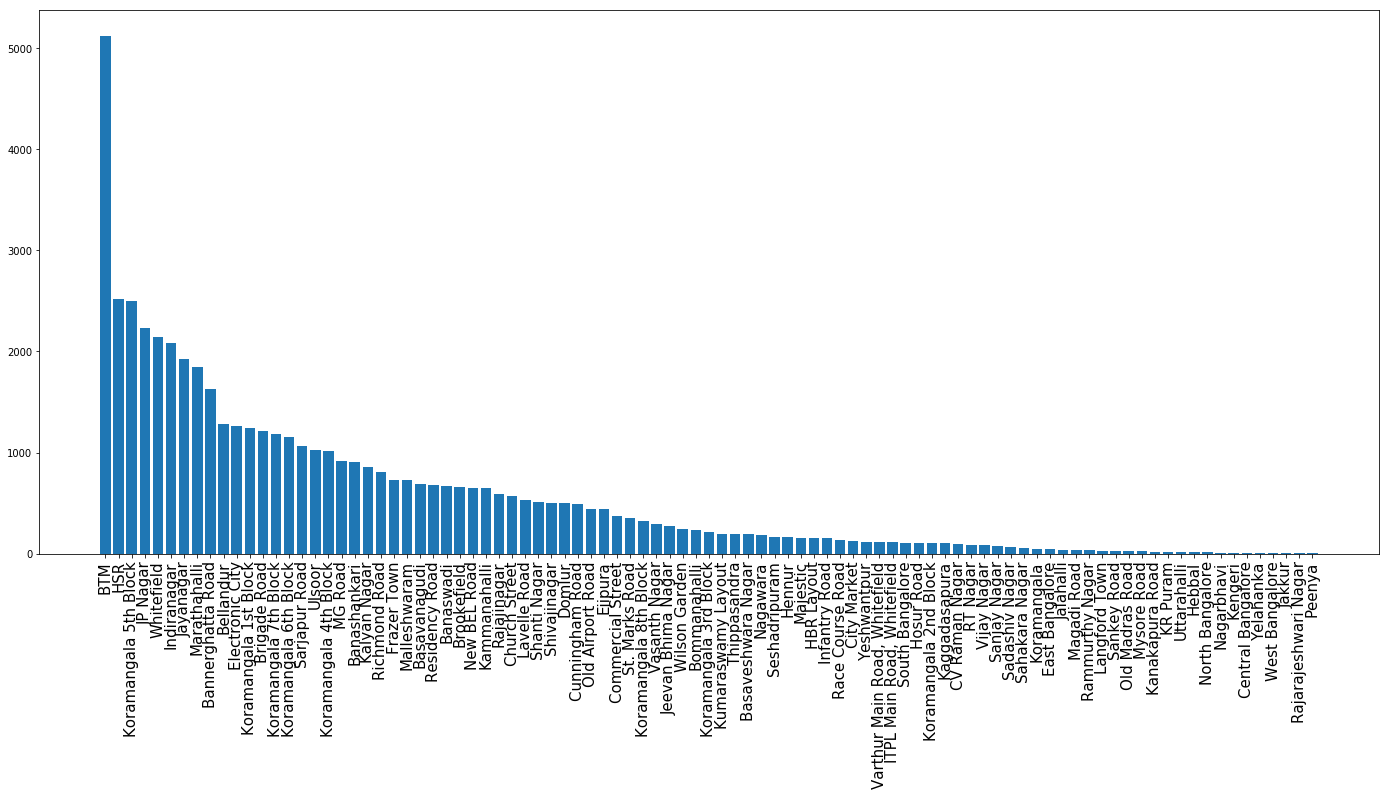

In [20]:
plt.figure(figsize=(24,10))
plt.bar(data["location"].value_counts().index,data["location"].value_counts().values)

plt.xticks(rotation=90,fontsize=15)
plt.show()

In [0]:
data.dropna(how ='any', inplace = True) #dropped the null values and again check the number of restaurants in locality

In [22]:
data.shape

(23259, 14)

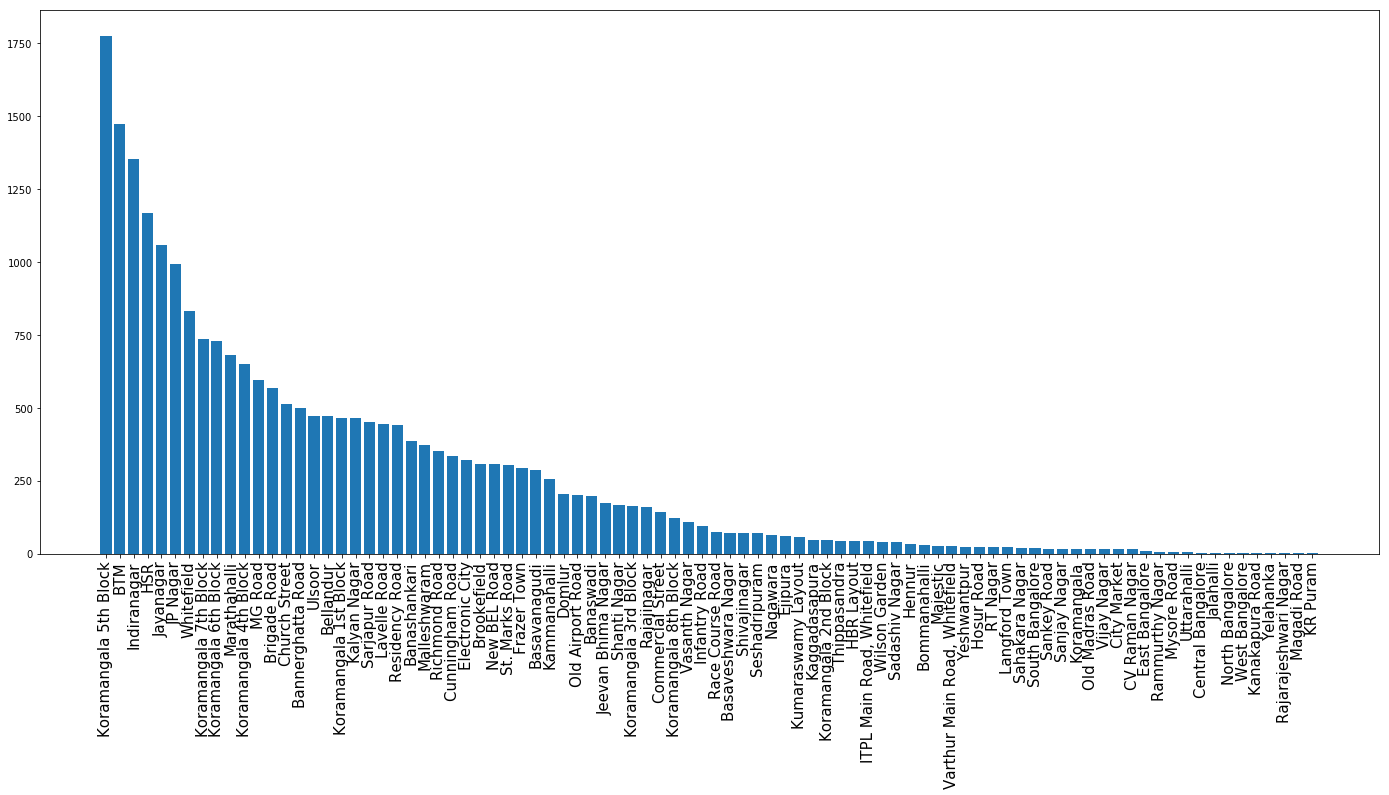

In [23]:
plt.figure(figsize=(24,10))
plt.bar(data["location"].value_counts().index,data["location"].value_counts().values)

plt.xticks(rotation=90,fontsize=15)
plt.show()

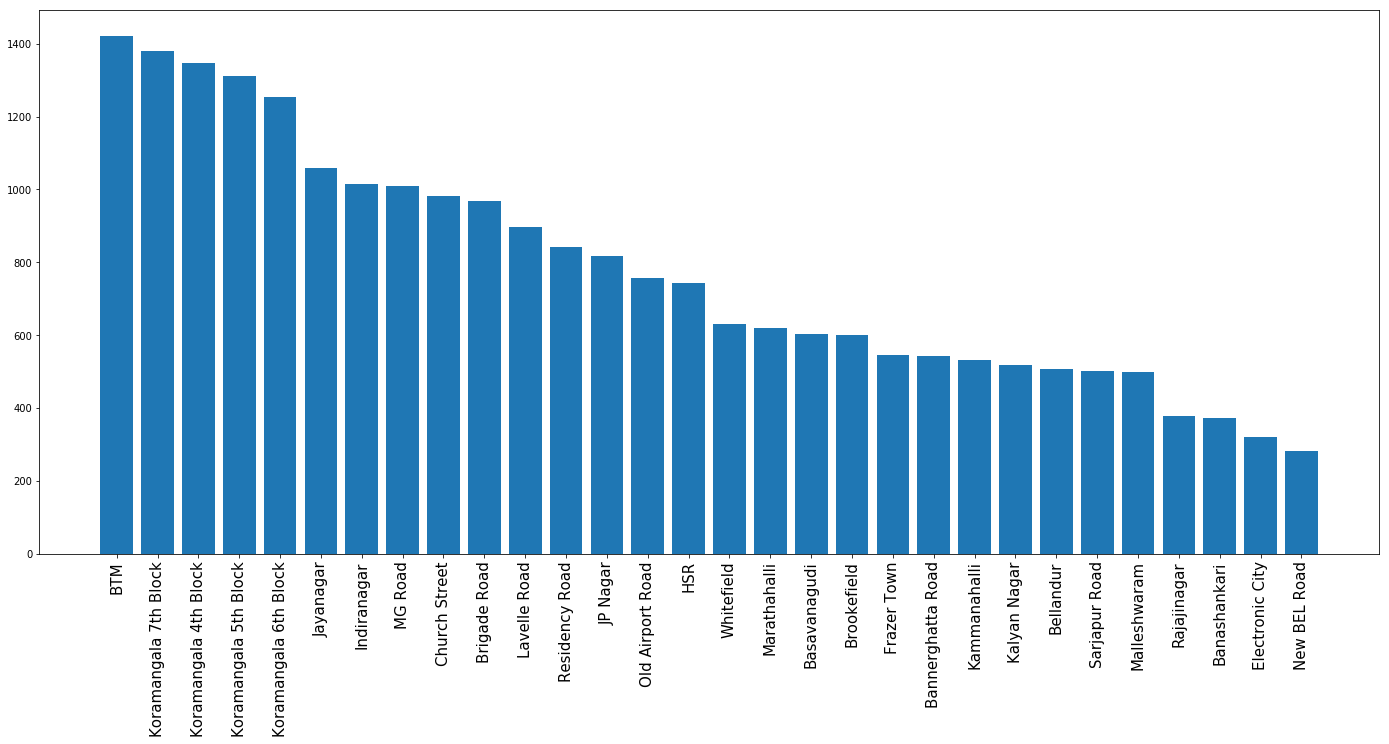

In [24]:
plt.figure(figsize=(24,10))
plt.bar(data["listed_in(city)"].value_counts().index,data["listed_in(city)"].value_counts().values)

plt.xticks(rotation=90,fontsize=15)
plt.show()


#listed_in_(city) and location has almost same values so we can use any of them to investigate further. 

In [25]:
data["rest_type"].value_counts()[:10]

Casual Dining         7331
Quick Bites           5253
Cafe                  2375
Dessert Parlor        1083
Casual Dining, Bar     985
Delivery               704
Bar                    358
Takeaway, Delivery     342
Bar, Casual Dining     336
Pub                    325
Name: rest_type, dtype: int64

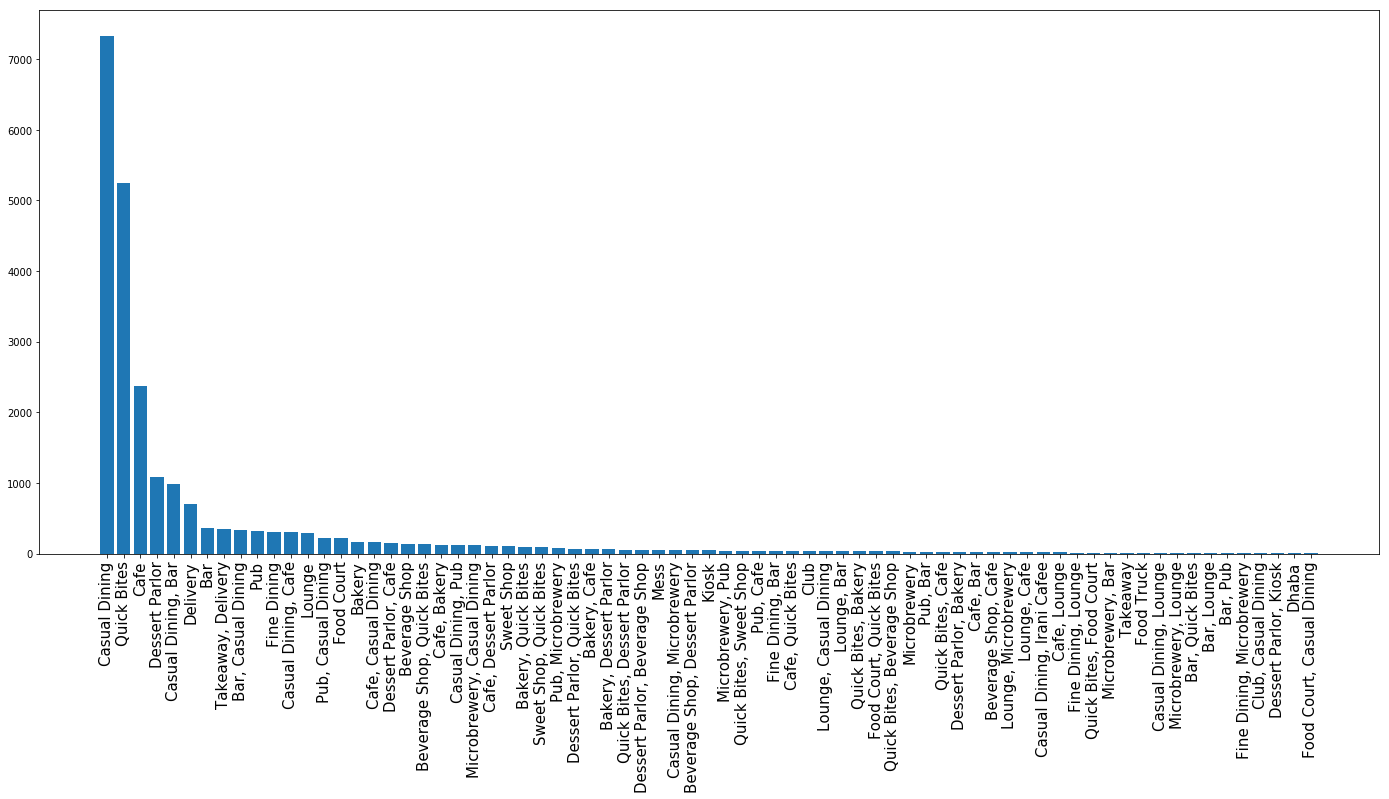

In [26]:
plt.figure(figsize=(24,10))
plt.bar(data["rest_type"].value_counts().index,data["rest_type"].value_counts().values)

plt.xticks(rotation=90,fontsize=15)
plt.show()

#It shows the high number of casual dining and quick bites

In [27]:
data["cuisines"].value_counts()[:10]

North Indian                           1152
North Indian, Chinese                   779
South Indian                            366
Cafe                                    285
South Indian, North Indian, Chinese     233
Bakery, Desserts                        216
Desserts, Beverages                     216
Ice Cream, Desserts                     212
Chinese                                 210
Desserts                                207
Name: cuisines, dtype: int64

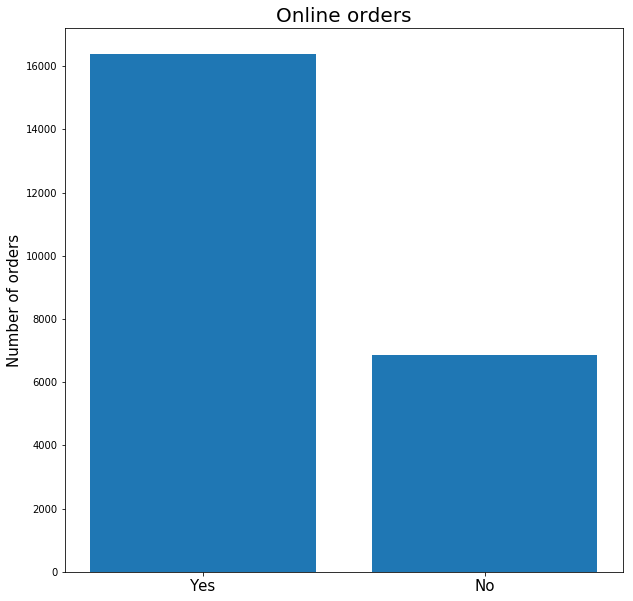

In [28]:
plt.figure(figsize=(10,10))
plt.bar(data["online_order"].value_counts().index,data["online_order"].value_counts().values)

plt.xticks(fontsize=15)
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

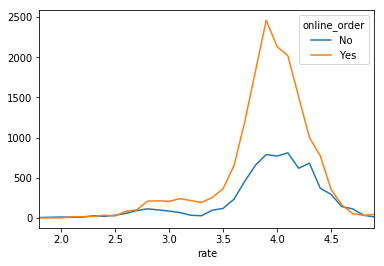

In [29]:
pd.crosstab(data['rate'], data['online_order']).plot()
plt.show()

#It shows that restaurant will get a high rating if it has online order facility. 

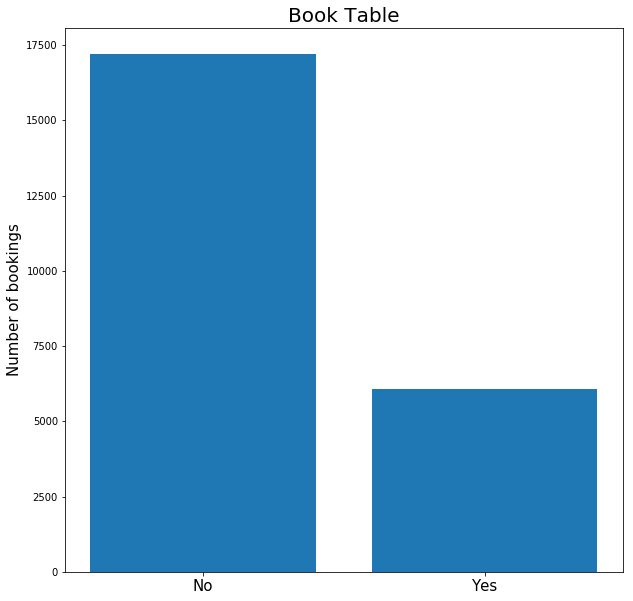

In [30]:
plt.figure(figsize=(10,10))
plt.bar(data["book_table"].value_counts().index,data["book_table"].value_counts().values)

plt.xticks(fontsize=15)
plt.title('Book Table', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

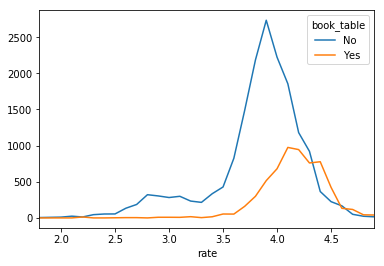

In [31]:
pd.crosstab(data['rate'], data['book_table']).plot()
plt.show()

#This shows that very few restaurants have the facility of booking tables and the rating for those restaurants are quite high

In [32]:
data[data.book_table.isin(["Yes"])]   #All the restaurants where table booking is possible.

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Banashankari
57,Wamama,Yes,Yes,4.2,354,Banashankari,Casual Dining,"Sushi, Noodles, Wine, Khau Suey, Mocktails, Ya...","Asian, Korean, Indonesian, Japanese, Chinese, ...",800,"[('Rated 4.0', 'RATED\n I really like the dec...",[],Delivery,Banashankari
61,Goa 0 Km,Yes,Yes,3.6,163,Kumaraswamy Layout,Casual Dining,"Sea Food, Crab Meat, Crab Soup, Fish Curry, Ch...","Goan, Seafood, North Indian, Chinese, Biryani",800,"[('Rated 4.0', 'RATED\n 1) food very nice\n2)...",[],Delivery,Banashankari
63,1947,No,Yes,4.0,808,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850,"[('Rated 4.0', 'RATED\n Excellent food I had ...",[],Delivery,Banashankari
148,Sri Udupi Food Hub,Yes,Yes,4.1,175,Jayanagar,Casual Dining,"Filter Coffee, Masala Dosa, Idli, Vada","South Indian, North Indian, Chinese, Beverages",500,"[('Rated 3.0', ""RATED\n Had been here with fa...","['Idili [2 pieces] with Vada [1 Piece]', 'Poor...",Delivery,Banashankari
166,Patio 805,Yes,Yes,4.1,364,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari


In [0]:
data.rename(columns={"approx_cost(for two people)" : "approx_cost"}, inplace=True)  #renaming this column

In [34]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

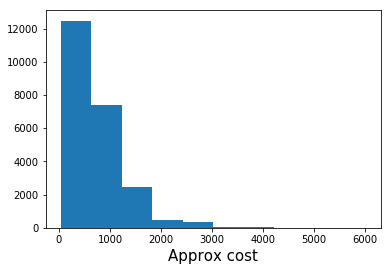

In [35]:
data.approx_cost = data.approx_cost.apply(lambda x : x.replace(",",""))

data.approx_cost = data.approx_cost.astype(int)
plt.hist(data.approx_cost)
plt.xlabel('Approx cost', fontsize = 15)
plt.show()

#shows the approximate cost of 2 person which for normal restaurants are below 1000.

Text(0.5, 1.0, 'Aprrox Cost Distrubution for all restaurants')

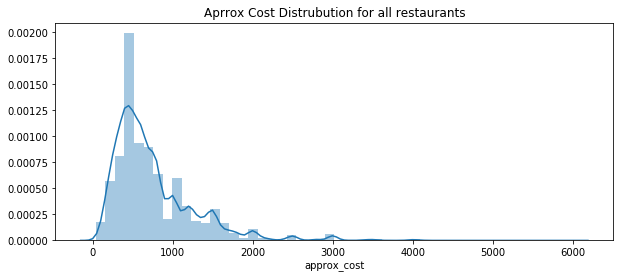

In [36]:
fig, ax = plt.subplots(figsize=[10,4])
sns.distplot(data.approx_cost,ax=ax)
ax.set_title('Aprrox Cost Distrubution for all restaurants')

In [37]:
data.approx_cost.describe()

count    23259.000000
mean       753.585279
std        520.495760
min         40.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max       6000.000000
Name: approx_cost, dtype: float64

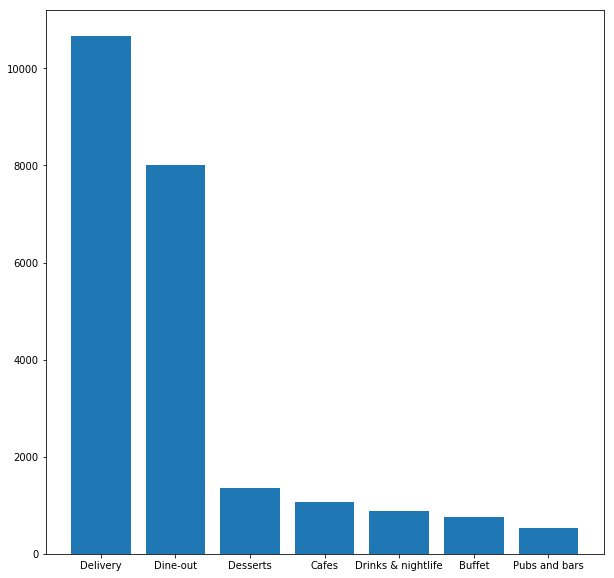

In [38]:
plt.figure(figsize=(10,10))
plt.bar(data["listed_in(type)"].value_counts().index,data["listed_in(type)"].value_counts().values)
plt.show()

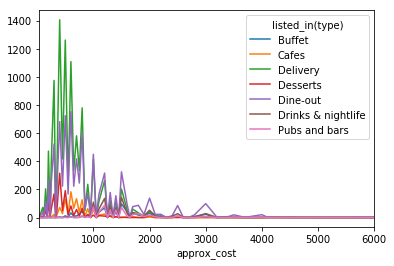

In [39]:
pd.crosstab(data['approx_cost'], data['listed_in(type)']).plot()
plt.show()

#shows that pubs and bars have the highest cost.

In [0]:
df_cheap = data[["name", "location", "approx_cost", "rest_type", "cuisines"]].groupby(["approx_cost"], sort = True)

In [0]:
df_cheap = df_cheap.filter(lambda x:x.mean() <= 1500)
df_cheap = df_cheap.sort_values(by=['approx_cost'])

#Here we are taking all those restaurants whose avg. cost if max. 1500

In [43]:
df_cheap.approx_cost.max(), df_cheap.approx_cost.min(), df_cheap.approx_cost.mean()

(1500, 40, 654.7525573679845)

In [0]:
df_expensive = data[['name','approx_cost','location','rest_type','cuisines']].groupby(['approx_cost'], sort = True)
df_expensive = df_expensive.filter(lambda x: x.mean() >= 3000)
df_expensive = df_expensive.sort_values(by=['approx_cost'])

#Expensive restaurants

In [45]:
df_expensive.approx_cost.max(), df_expensive.approx_cost.min(), df_expensive.approx_cost.mean()

(6000, 3000, 3249.785407725322)

In [0]:
df_rate = data[["name","rate"]].groupby(["rate"],sort=True)
df_rate = df_rate.filter(lambda x : x.mean() >= 4.5)
df_rate = df_rate.sort_values(by=['rate'])

#Filter restaurants who has highrating

In [48]:
df_rate.shape

(1236, 2)

In [49]:
pd.merge(df_cheap, df_rate, how='inner', on=['name'])    #cheapest restaurants with high rating

,name,location,approx_cost,rest_type,cuisines,rate
0,Taaza Thindi,Banashankari,100,Quick Bites,South Indian,4.7
1,Brahmin's Coffee Bar,Basavanagudi,100,Quick Bites,South Indian,4.8
2,Brahmin's Coffee Bar,Malleshwaram,250,Quick Bites,South Indian,4.8
3,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
4,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
5,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
6,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
7,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
8,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5
9,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5


In [50]:
pd.merge(df_expensive, df_rate, how='inner', on = ['name'])   #expensive restaurants with high rating

,name,approx_cost,location,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
1,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
2,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
3,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
4,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
5,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
6,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
7,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
8,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6
9,Rim Naam - The Oberoi,3000,MG Road,Fine Dining,Thai,4.6


In [51]:
data['votes'].max(), data['votes'].min(), data['votes'].mean()

(16832, 0, 605.3887097467647)

In [0]:
df_votes = data[["name","votes"]].groupby(["votes"],sort=True)
df_votes = df_votes.filter(lambda x : x["votes"].mean() >= 175)
df_votes = df_votes.sort_values(by = ['votes'])

#make a dataset based on decent number of votes.

In [53]:
pd.merge(pd.merge(df_cheap, df_rate, how='inner', on=['name']), df_votes, how='inner', on = ['name'])  #Cheap restaurant with high rating and high votes

,name,location,approx_cost,rest_type,cuisines,rate,votes
0,Taaza Thindi,Banashankari,100,Quick Bites,South Indian,4.7,651
1,Brahmin's Coffee Bar,Basavanagudi,100,Quick Bites,South Indian,4.8,282
2,Brahmin's Coffee Bar,Basavanagudi,100,Quick Bites,South Indian,4.8,2679
3,Brahmin's Coffee Bar,Malleshwaram,250,Quick Bites,South Indian,4.8,282
4,Brahmin's Coffee Bar,Malleshwaram,250,Quick Bites,South Indian,4.8,2679
5,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5,203
6,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5,203
7,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5,206
8,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5,207
9,Chikkanna Tiffin Room,City Market,150,Quick Bites,South Indian,4.5,203
